In [1]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [2]:
program = 'bright'
targets_path = 'targets/no_spectra/{}/'.format(program)
epoch_path = 'zcat/{}/'.format(program)

In [3]:
mtl_files = glob.glob(epoch_path+"*/mtl.fits")
zcat_files = np.sort(glob.glob(epoch_path+"*/zcat.fits"))
print(zcat_files)
n_files = len(mtl_files)

['zcat/bright/0/zcat.fits' 'zcat/bright/1/zcat.fits'
 'zcat/bright/2/zcat.fits' 'zcat/bright/3/zcat.fits'
 'zcat/bright/4/zcat.fits' 'zcat/bright/5/zcat.fits'
 'zcat/bright/6/zcat.fits']


In [4]:
mtl = Table.read(mtl_files[0])
zcat_data = {}
for i in range(n_files):
    zcat_data[i] = Table.read(zcat_files[i])
    print(len(zcat_data[i]))

4600
9200
27594
41389
45984
55150
137437


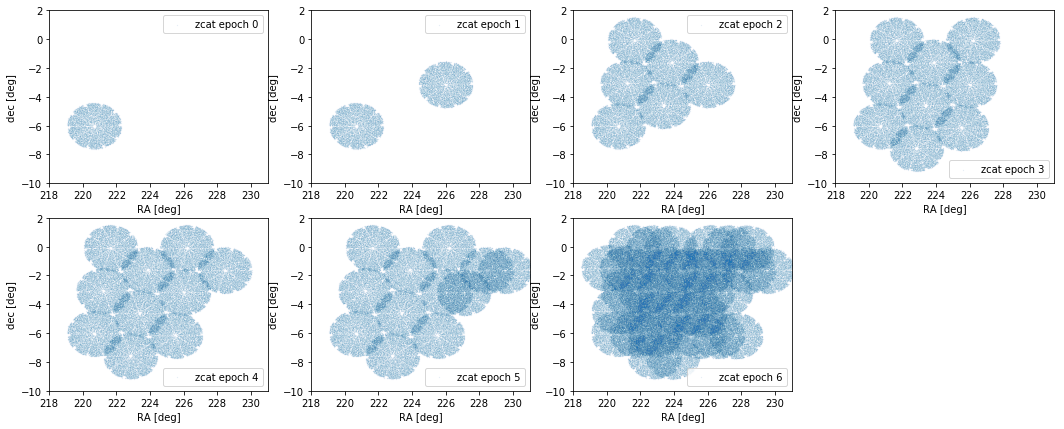

In [5]:
plt.figure(figsize=(18,7))
for i in range(n_files):
    pos_data = join(zcat_data[i], mtl['TARGETID', 'RA','DEC'], keys='TARGETID')
    plt.subplot(2,4,i+1)
    plt.scatter(pos_data['RA'], pos_data['DEC'], s=0.01, alpha=0.4, label='zcat epoch {}'.format(i))
    plt.legend()
    if(program=='bright'):
        plt.xlim([218,231])
        plt.ylim([-10,2])
    plt.xlabel('RA [deg]')
    plt.ylabel('dec [deg]')